# Bank Marketing

### Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

source: 
- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [18]:
df = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/bank-additional-full.csv', sep=';')

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [22]:
df.shape

(41188, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [25]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Exploratory Data Ananlysis

### Analysis of categorical variables

In [26]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]

print('Categorical Variables:')
print(len(var_categorical))
print('Numerical Variables:')
print(len(var_numerical))

Categorical Variables:
10
Numerical Variables:
10


In [27]:
# check categorical class

for i in var_categorical:
    print(i, ":", df[i].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']


In [28]:
# Number of distinct values in variables

for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 12
2. Marital: 4
3. Education: 8
4. Default: 3
5. Housing: 3
6. Loan: 3
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
# target count

df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [31]:
target_perc = round(df.y.value_counts() / len(df) *100, 2)
target_perc

no     88.73
yes    11.27
Name: y, dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/target_distribution.png'

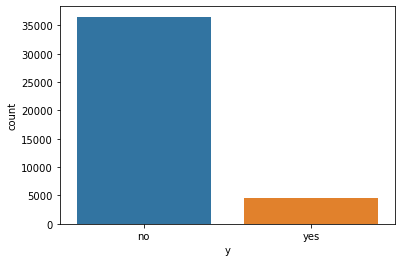

In [32]:
# Target Visualization

# Y = Target
sns.countplot(x = df["y"])  #Imbalanced dataset
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/target_distribution.png')

Target distribution plot: 88% with No Subscribed clients vs 11% with Subscribed clients indicates an unbalanced dataset that we will need to handle before modeling.

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. We will delete them

In [33]:
marital_perc = round(df.marital.value_counts() / len(df) *100, 2)
marital_perc

married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64

In [34]:
# droping the marital data which is not giving useful information

df2 = df.drop(df[df['marital'] == 'unknown'].index, axis = 0, inplace = False)
marital_perc2 = round(df2.marital.value_counts() / len(df2) *100, 2)
marital_perc2

married     60.64
single      28.14
divorced    11.22
Name: marital, dtype: float64

In [35]:
age_perc = round(df2.age.value_counts() / len(df2) *100, 2)
age_perc

31    4.72
32    4.48
33    4.44
36    4.33
35    4.27
      ... 
89    0.00
91    0.00
87    0.00
94    0.00
95    0.00
Name: age, Length: 78, dtype: float64

In [36]:
education_perc = round(df2.education.value_counts() / len(df2) *100, 2)
education_perc

university.degree      29.52
high.school            23.11
basic.9y               14.69
professional.course    12.74
basic.4y               10.14
basic.6y                5.56
unknown                 4.19
illiterate              0.04
Name: education, dtype: float64

In [37]:
# droping the education data which is not giving useful information

df3 = df2.drop(df2[df2['education'] == 'unknown'].index, axis = 0, inplace = False)
df4 = df3.drop(df3[df3['education'] == 'illiterate'].index, axis = 0, inplace = False)

education_perc2 = round(df4.education.value_counts() / len(df4) *100, 2)
education_perc2

university.degree      30.83
high.school            24.13
basic.9y               15.33
professional.course    13.30
basic.4y               10.59
basic.6y                5.81
Name: education, dtype: float64

In [38]:
contact_perc = round(df4.contact.value_counts() / len(df4) *100, 2)
contact_perc

cellular     63.67
telephone    36.33
Name: contact, dtype: float64

In [39]:
day_of_week_perc = round(df4.day_of_week.value_counts() / len(df4) *100, 2)
day_of_week_perc

thu    20.90
mon    20.70
wed    19.90
tue    19.63
fri    18.87
Name: day_of_week, dtype: float64

In [40]:
month_perc = round(df4.month.value_counts() / len(df4) *100, 2)
month_perc

may    33.54
jul    17.25
aug    15.16
jun    12.84
nov    10.09
apr     6.35
oct     1.74
sep     1.32
mar     1.30
dec     0.43
Name: month, dtype: float64

In [41]:
housing_perc = round(df4.housing.value_counts() / len(df4) *100, 2)
housing_perc

yes        52.48
no         45.11
unknown     2.41
Name: housing, dtype: float64

In [42]:
# droping the housing data which is not giving useful information

df5 = df4.drop(df4[df4['housing'] == 'unknown'].index, axis = 0, inplace = False)

housing_perc = round(df5.housing.value_counts() / len(df5) *100, 2)
housing_perc

yes    53.78
no     46.22
Name: housing, dtype: float64

In [43]:
loan_perc = round(df5.loan.value_counts() / len(df5) *100, 2)
loan_perc

no     84.4
yes    15.6
Name: loan, dtype: float64

In [44]:
job_perc = round(df5.job.value_counts() / len(df5) *100, 2)
job_perc

admin.           25.86
blue-collar      22.26
technician       16.61
services          9.67
management        7.10
retired           4.10
entrepreneur      3.53
self-employed     3.50
housemaid         2.57
unemployed        2.51
student           1.79
unknown           0.50
Name: job, dtype: float64

In [45]:
# droping the job data which is not giving useful information

df6 = df5.drop(df5[df5['job'] == 'unknown'].index, axis = 0, inplace = False)
job_perc2 = round(df6.job.value_counts() / len(df6) *100, 2)
job_perc2

admin.           25.99
blue-collar      22.37
technician       16.69
services          9.72
management        7.14
retired           4.12
entrepreneur      3.55
self-employed     3.52
housemaid         2.58
unemployed        2.52
student           1.80
Name: job, dtype: float64

In [46]:
# we will keep the "unknown" value since it represents 20% of the observations

default_perc = round(df6.default.value_counts() / len(df6) *100, 2)
default_perc

no         79.72
unknown    20.27
yes         0.01
Name: default, dtype: float64

In [47]:
#find duplicated rows in the dataframe 

duplicate = df6[df6.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36951,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes


In [48]:
# drop duplicated rows

df6.drop_duplicates(keep=False, inplace=True)
df6

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
#Let's verify the drop of the duplication

duplicate = df6[df6.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [50]:
df6.shape

(38205, 21)

# Visualization

## Categorical Variables

#### Univariate Analysis of Categorical Columns

Job


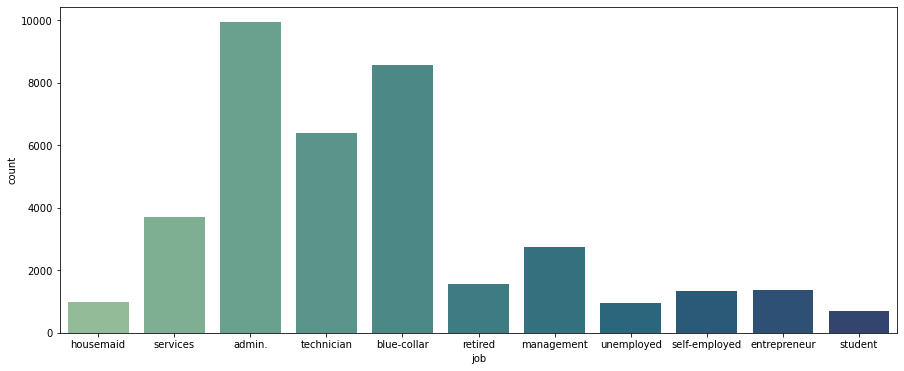

Marital


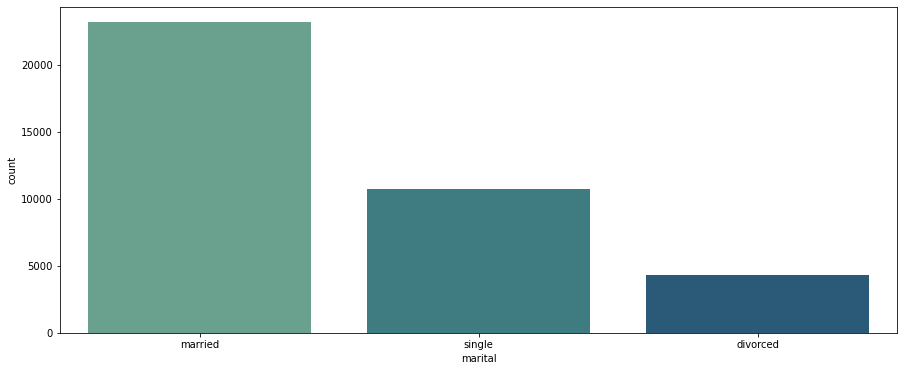

Education


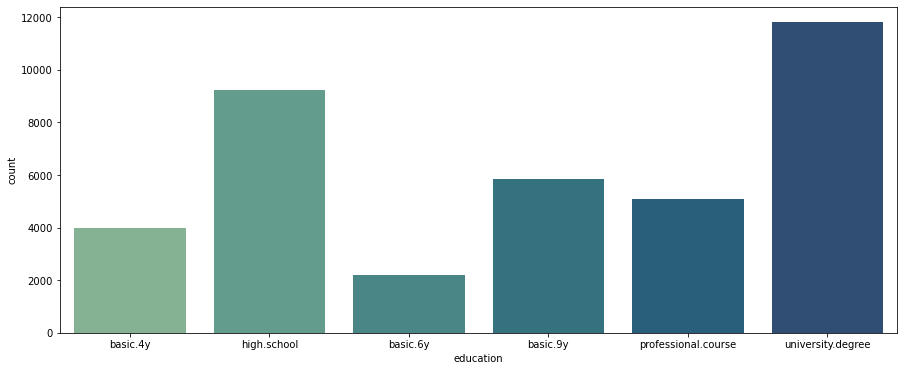

Default


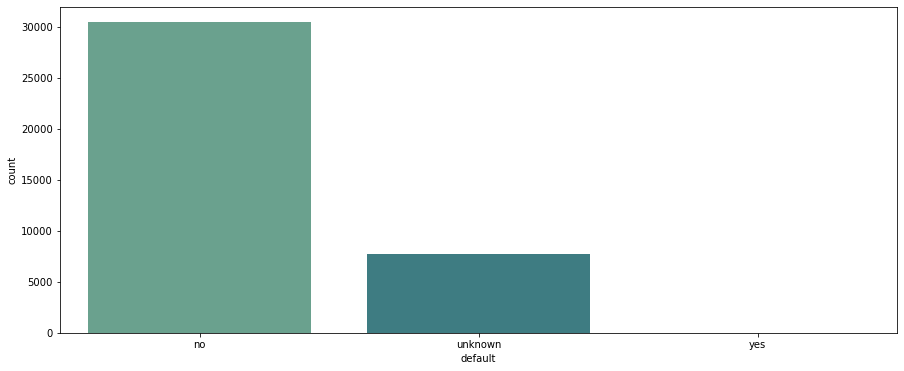

Housing


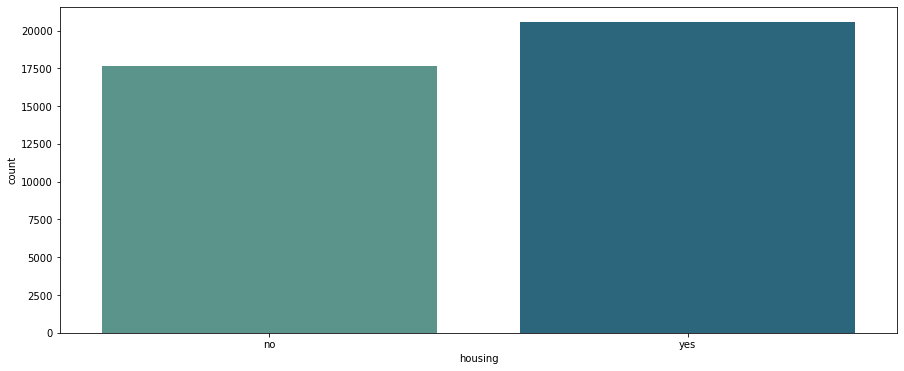

Loan


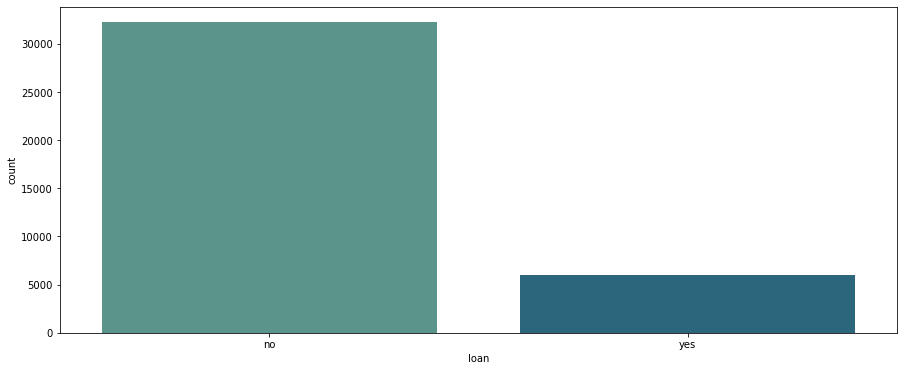

Contact


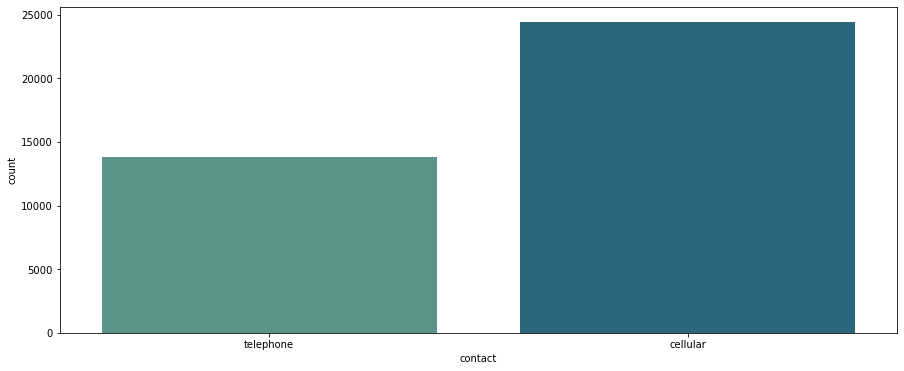

Month


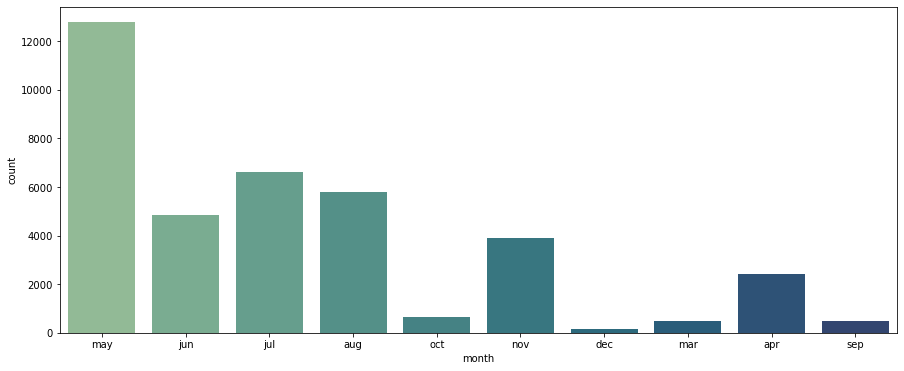

Day_Of_Week


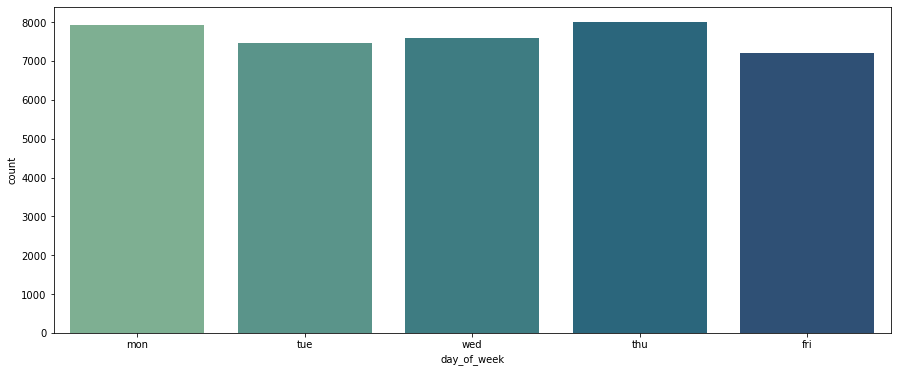

Poutcome


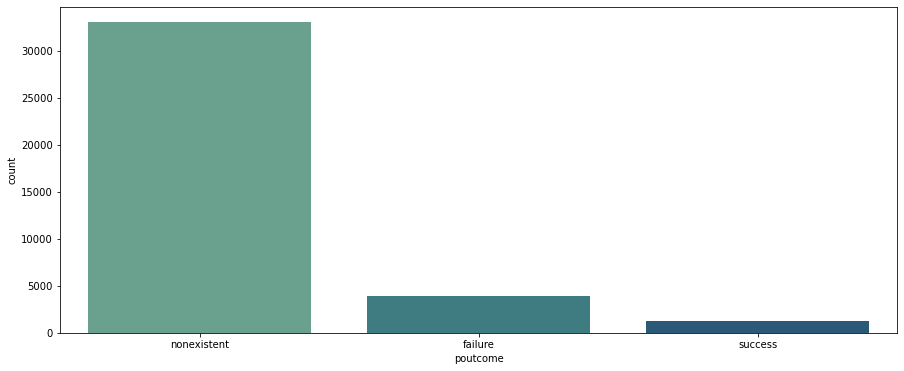

In [51]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df6[column], palette='crest')
    plt.show()

### Bivariate analysis of categorical variables

Job
Marital
Education
Default
Housing
Loan
Contact
Month
Day_Of_Week
Poutcome


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/cat_var.png'

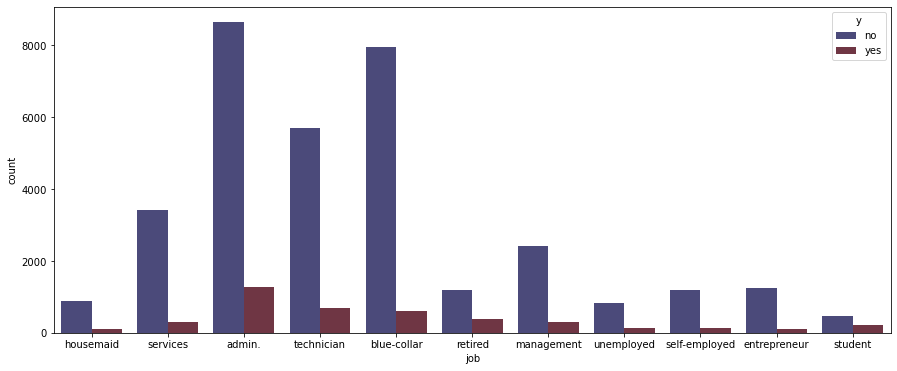

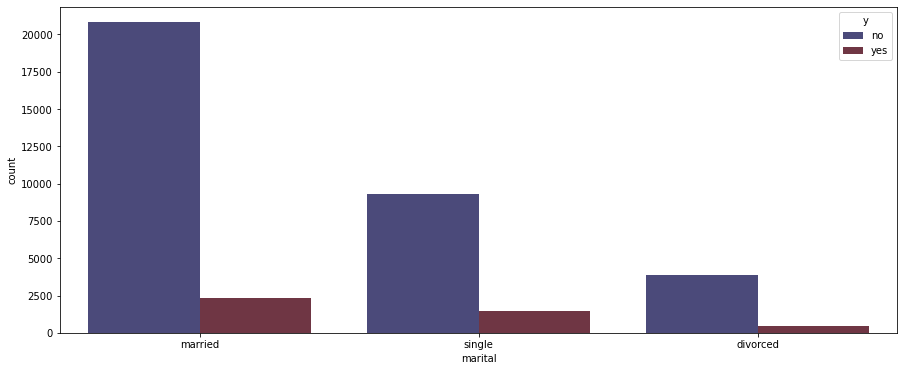

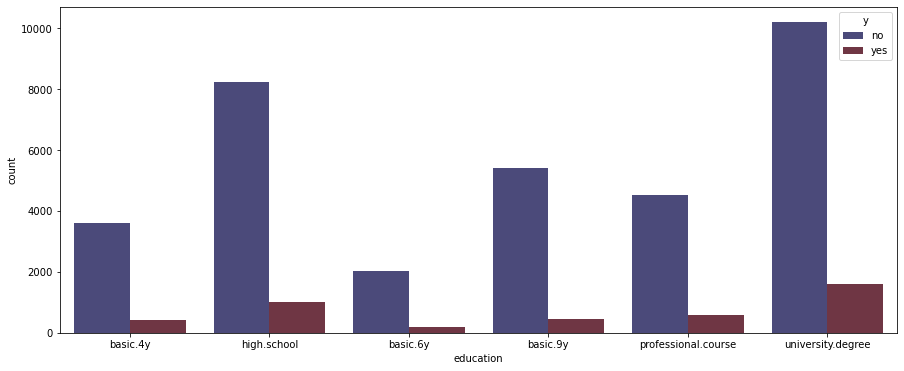

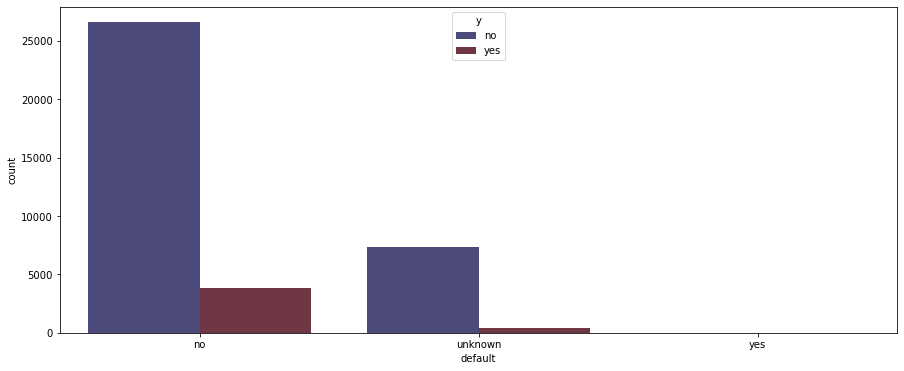

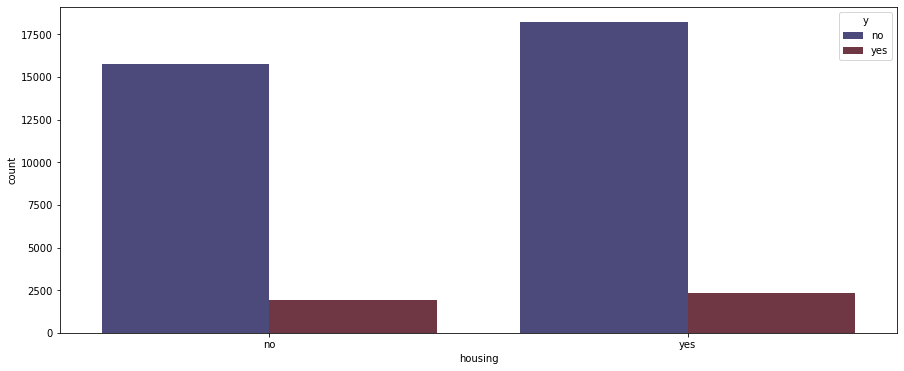

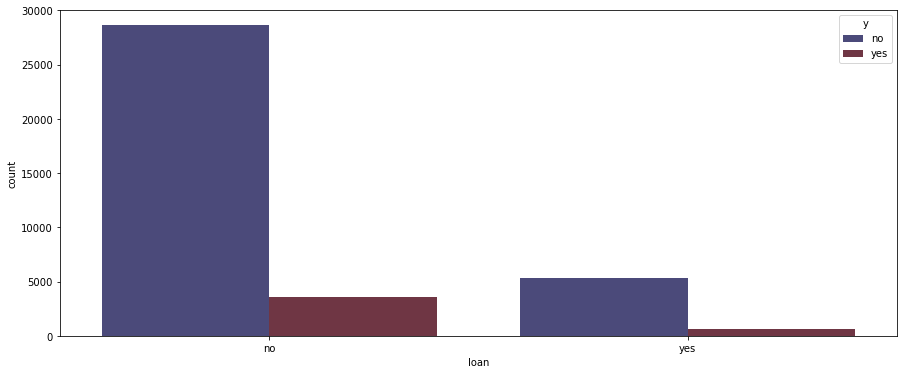

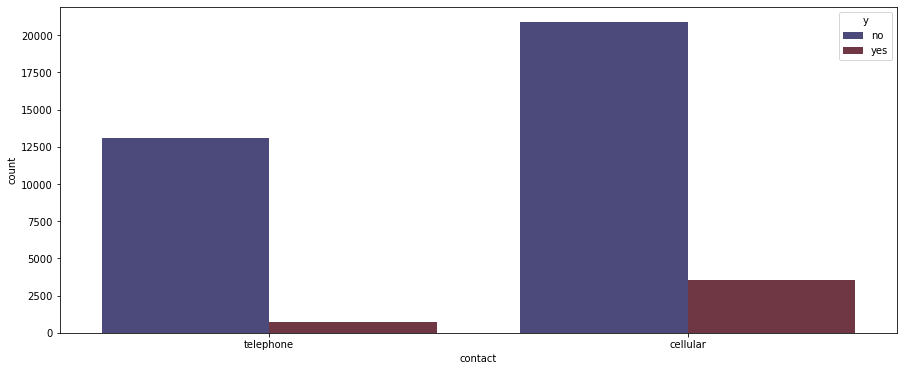

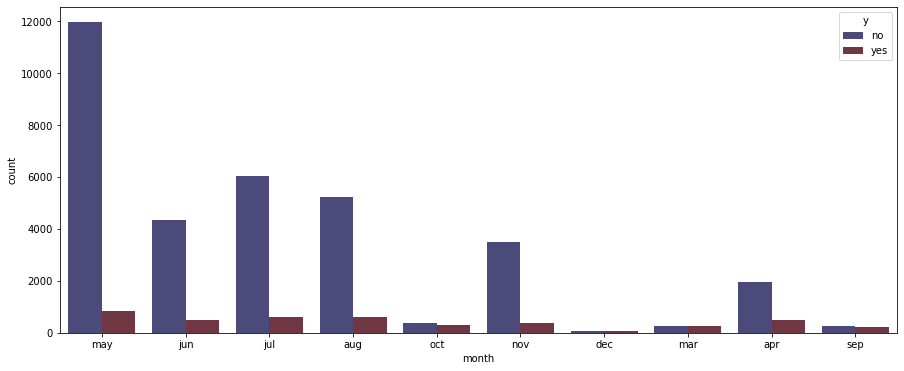

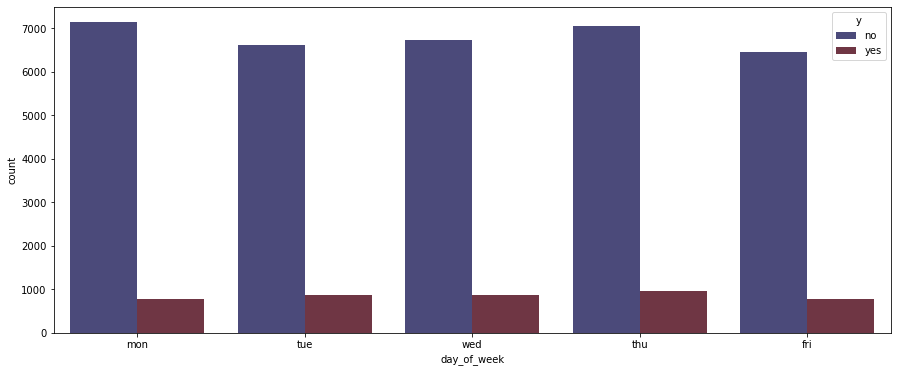

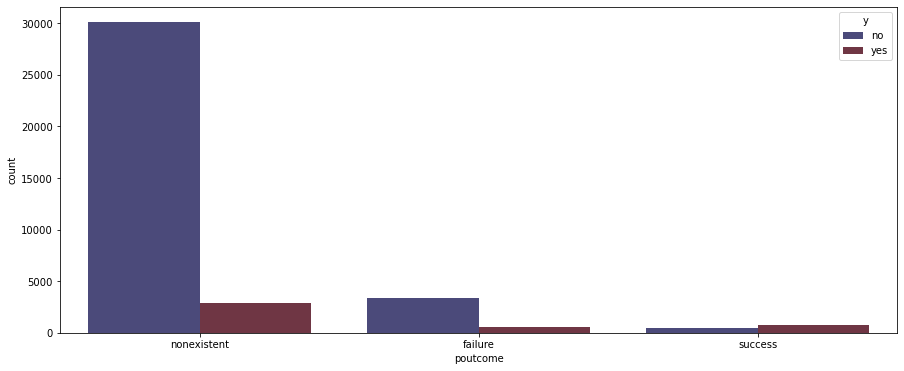

In [52]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df6[column], hue=df6["y"], palette='icefire')
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/cat_var.png')

#### Observations of categorical variables:

- Job: The top three professions that our customers belong to are - administration, blue-collar and technician jobs. 25% comes from admin jobs.
- Marital: A huge number of the customers are married (60%).
- Education: Client with university degree (29%) and high school (23%) were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number).
- Default: Majority of the customers do not have a credit in default (82%). This variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
- Loan: We approach around 84% of client with not having personal loan. Only a few have applied for it (16%).
- Housing: Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.(Yes:54%, No:46%) 
- Contact: Cell-phones seem to be the most favoured method of reaching out to customers (63%).
- Response(Target):The target variable shows heavy imbalance (No= 89% / Yes= 11%).
- Month: Many customers have been contacted in the month of May (33%).
- Day of week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
- Poutcome: If a client took the term deposit last time then there is higher chances of that client subscribing to it again.

In [53]:
df6.shape

(38205, 21)

In [54]:
df6.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [55]:
# Default variable has no impact on the client subscribing for term deposit so we will drop this feature.

df6.drop(["default"], axis = 1, inplace=True)

In [56]:
var_categorical = list(set(var_categorical) - set(['default']))

In [57]:
var_categorical

['loan',
 'month',
 'contact',
 'job',
 'marital',
 'housing',
 'education',
 'poutcome',
 'day_of_week']

In [58]:
df6.dropna(inplace=True)

In [59]:
df6.shape

(38205, 20)

In [60]:
df6.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38205 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38205 non-null  int64  
 1   job             38205 non-null  object 
 2   marital         38205 non-null  object 
 3   education       38205 non-null  object 
 4   housing         38205 non-null  object 
 5   loan            38205 non-null  object 
 6   contact         38205 non-null  object 
 7   month           38205 non-null  object 
 8   day_of_week     38205 non-null  object 
 9   duration        38205 non-null  int64  
 10  campaign        38205 non-null  int64  
 11  pdays           38205 non-null  int64  
 12  previous        38205 non-null  int64  
 13  poutcome        38205 non-null  object 
 14  emp.var.rate    38205 non-null  float64
 15  cons.price.idx  38205 non-null  float64
 16  cons.conf.idx   38205 non-null  float64
 17  euribor3m       38205 non-null 

## Numerical Variables

In [62]:
# Drop "duration" since this attribute is mostly related for Interpretative models and no for Predictive models. A call's duration can't be calculated before the call, only after the call. the call 

duration = df6["duration"]

df6.drop(["duration"], axis = 1, inplace=True)

In [63]:
var_numerical = list(set(var_numerical) - set(['duration']))

In [64]:
var_numerical

['emp.var.rate',
 'nr.employed',
 'campaign',
 'age',
 'previous',
 'cons.conf.idx',
 'pdays',
 'cons.price.idx',
 'euribor3m']

In [65]:
df6.shape

(38205, 19)

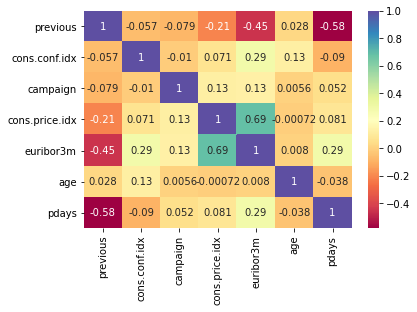

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/num_correlations.png'

<Figure size 432x288 with 0 Axes>

In [66]:
# numerical correlations

sns.heatmap(df6[['previous',
 'cons.conf.idx',
 'campaign',
 'cons.price.idx',
 'euribor3m',
 'age',
 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/num_correlations.png');

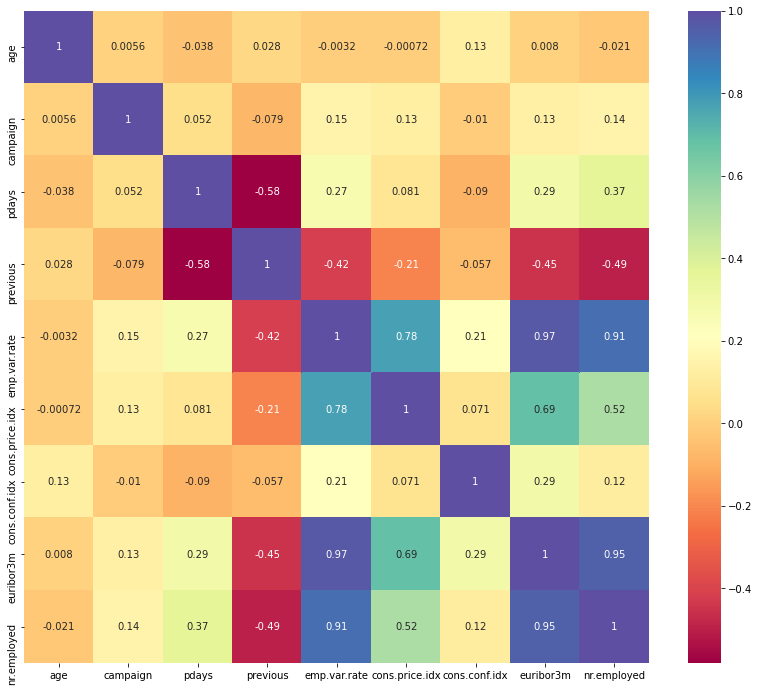

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/total_correlations.png'

<Figure size 432x288 with 0 Axes>

In [67]:
# complete dataset correlation

plt.figure(figsize=(14, 12))
sns.heatmap(df6.corr(), annot=True, cmap='Spectral')
plt.show()
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/total_correlations.png');

#### Handle highly correlated variables

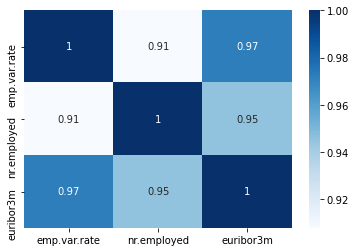

In [70]:
sns.heatmap(df6[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Blues')
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/charts/highly_correlations.png');

#### Observations

- Positive high correlation between:
1. 'emp.var.rate' and 'nr.employed'
2. 'emp.var.rate' and 'euribor3m'
3. 'euribor3m' and 'nr.employed'

Euribor is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as “the price of money”.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor' also give us the price of money in current market.

In [ ]:
df6.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [ ]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

In [ ]:
var_numerical

In [ ]:
df6.shape

In [ ]:
df6[var_numerical].describe()

#### Handling Outliers

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers. We can notice outliers mainly in the following 2 features:

In [ ]:
df6[["age", "campaign"]].describe()


In [ ]:
sns.distplot(x = df6["age"])
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/outlier_1.png')

In [ ]:
sns.distplot(x = df6["campaign"]);
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/outlier_2.png')


"age" and "campaign" are skewed towards right, we will compute the Interquartile Range (IQR) based method and replace the outliers with the lower and upper boundaries.

In [ ]:
# compute interquantile range to calculate the boundaries

lower_boundries= []
upper_boundries= []
for i in ["age", "campaign"]:
    IQR= df6[i].quantile(0.75) - df6[i].quantile(0.25)
    lower_bound= df6[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df6[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

In [ ]:
lower_boundries

In [ ]:
upper_boundries

In [ ]:
# replace the all the outliers which is greater then upper boundary by upper boundary

j = 0
for i in ["age", "campaign"]:
    df6.loc[df6[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

- For age the lower boundary (9.5) < minimum value (17)
- For duration the lower boundary is negative (-2.0), so replacing the outlier with the lower boundary is not required

In [ ]:
# Now, we don't have more outliers

df6[["age", "campaign"]].describe()

After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

### Encoding Categorical Features

Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [71]:
#categorical features

var_categorical

['loan',
 'month',
 'contact',
 'job',
 'marital',
 'housing',
 'education',
 'poutcome',
 'day_of_week']

In [72]:
# check categorical class
for i in var_categorical:
    print(i, ":", df6[i].unique())

loan : ['no' 'yes']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
contact : ['telephone' 'cellular']
job : ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced']
housing : ['no' 'yes']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree']
poutcome : ['nonexistent' 'failure' 'success']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']


- Features like job education month day_of_week has so many categories, we will Label Encode them as One Hot Encoding and Dummies would create so many columns

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
# initializing label encoder
le= LabelEncoder()

In [75]:
# iterating through each categorical feature and label encoding them

for feature in var_categorical:
    df6[feature]= le.fit_transform(df6[feature])

In [76]:
# label encoded dataset

df6.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [77]:
# Now, let's transform our categorical Target into a numerical Target

df6["y"].value_counts()

no     33953
yes     4252
Name: y, dtype: int64

In [78]:
df6["y"] = np.where(df6["y"].str.contains("yes"), 1, 0)

In [79]:
df6["y"].value_counts()

0    33953
1     4252
Name: y, dtype: int64

In [80]:
df6.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [81]:
# now, all our dataset is numerical

df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38205 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38205 non-null  int64  
 1   job             38205 non-null  int64  
 2   marital         38205 non-null  int64  
 3   education       38205 non-null  int64  
 4   housing         38205 non-null  int64  
 5   loan            38205 non-null  int64  
 6   contact         38205 non-null  int64  
 7   month           38205 non-null  int64  
 8   day_of_week     38205 non-null  int64  
 9   campaign        38205 non-null  int64  
 10  pdays           38205 non-null  int64  
 11  previous        38205 non-null  int64  
 12  poutcome        38205 non-null  int64  
 13  emp.var.rate    38205 non-null  float64
 14  cons.price.idx  38205 non-null  float64
 15  cons.conf.idx   38205 non-null  float64
 16  euribor3m       38205 non-null  float64
 17  nr.employed     38205 non-null 

In [ ]:
df6.shape

#### Correlation among feature variables

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df6.corr(), annot=True, cmap='Spectral');
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/Images/correlation_heatmap2.png')

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

In [84]:
#Feature correlation importance

df6.corr()['y'].sort_values(ascending = False)

y                 1.000000
previous          0.221253
poutcome          0.131006
education         0.053127
cons.conf.idx     0.051138
marital           0.041832
age               0.029878
job               0.020721
day_of_week       0.014795
housing           0.010018
month            -0.002629
loan             -0.005706
campaign         -0.065094
cons.price.idx   -0.132575
contact          -0.140961
emp.var.rate     -0.291975
euribor3m        -0.300381
pdays            -0.319314
nr.employed      -0.347760
Name: y, dtype: float64

In [85]:
data = df6.to_csv('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/data', index = None, header=True)

### Handling imbalanced dataset

Class distribution in the target variable is ~88:87 indicating an imbalance dataset.

In [86]:
target_perc2 = round(df6.y.value_counts() / len(df6) *100, 2)
target_perc2

0    88.87
1    11.13
Name: y, dtype: float64

In [87]:
var_numerical

['emp.var.rate',
 'nr.employed',
 'campaign',
 'age',
 'previous',
 'cons.conf.idx',
 'pdays',
 'cons.price.idx',
 'euribor3m']

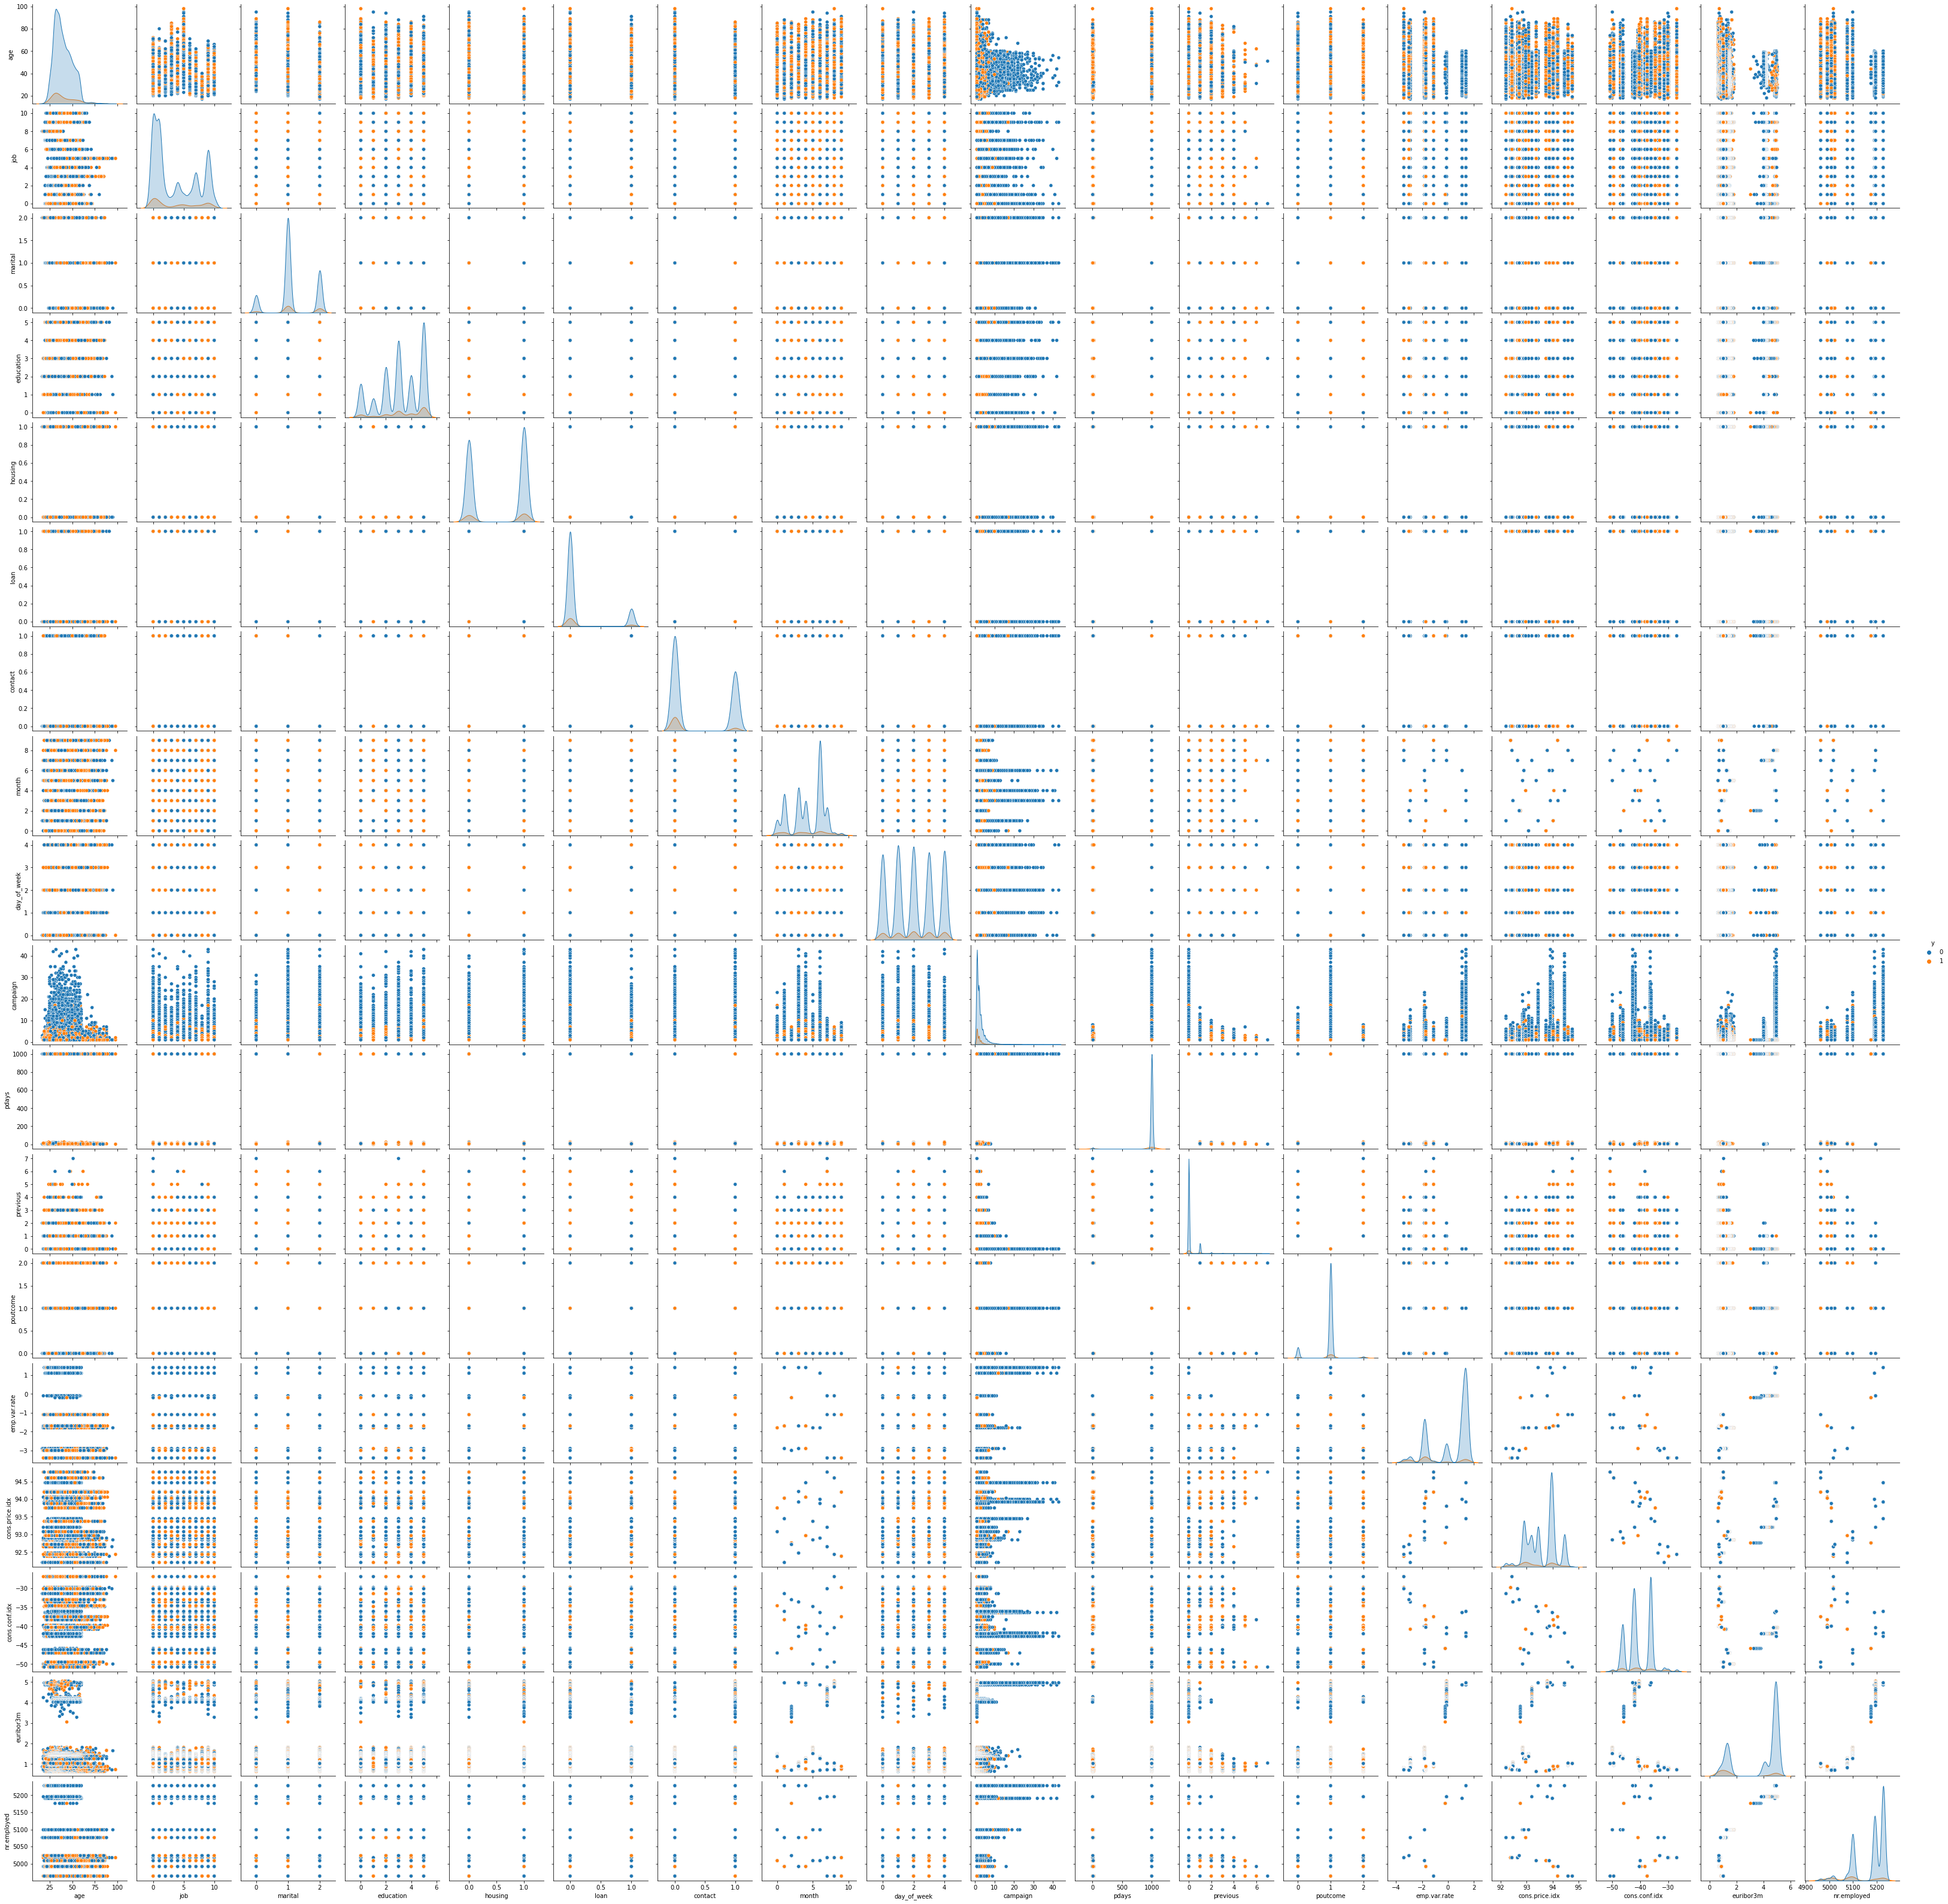

In [88]:
# visualizing numerical columns

sns.pairplot(hue='y', data = df6)
plt.show()